<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI286 - Computación Científica II</h1>
    <h1> estudio ttp</h1> 
    <h3> Cesar Contreras Zamorano </h3>
    <h3> cesar.contrerasz@sansano.usm.cl </h3>
    <h3> 2973060-1 </h3>
</center>
<p>
<center>Diciembre 2019 - v1.0 </center>
</p>

---

In [8]:
import numpy as np
import scipy as sp
import imutils
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from numpy import linalg as la
from ipywidgets import interact, fixed
import ipywidgets as widgets
import scipy.optimize as optimize

In [9]:
L=20
plt.figure(figsize=(L,L/2))
plt.plot(np.linspace(0, 1, 31),sol_s0[:,0],'-')
#plt.plot(np.arange(0, 1, h),sol_s0[:,0],'-')
plt.show()

NameError: name 'sol_s0' is not defined

<Figure size 1440x720 with 0 Axes>

## EJERCICIOS 3

### 3.1.b

In [21]:
# Forward Euler Method para 1 valor de t, por tanto la iteracion se hace fuera del metodo.
def euler_ode(y,t,f,h):
    return y+h*f(t,y)

# Runge-Kutta of Second order
def RK2_ode(y,t,f,h):
    k1=y+h/2.0*f(t,y) #or euler_ode(y,t,f,h)
    return y+h*f(t+h/2.0,k1)
    # k1=h*f(t,y)
    # return y+h*f(t+h/2.0,y+k1/2.0)

# Runge-Kutta 
def RK4_ode(y,t,f,h):
    k1=f(t,y)
    k2=f(t+h/2.0,y+(h/2.0)*k1)
    k3=f(t+h/2.0,y+(h/2.0)*k2)
    k4=f(t+h,y+h*k3)
    return y+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

#este codigo funciona bajo dos premisas
def solve_edo(h, f, y0, T_l, T_r, solver='euler'):
    #generamos los diferentes valores de t y agregamos el valor final porque arange no considera el final del intervalo
    t_times = np.arange(T_l, T_r, h)
    t_times = np.append(t_times, T_r)
    #t_times = np.linspace(T_l, T_r, 4)
    #generamos una arreglo para guardar nuestras soluciones
    y_output = np.zeros([t_times.size,np.size(y0)])
    #guardamos la solucion inicial
    y_output[0,:] = y0
    for i in range(1,t_times.size):
        if solver=='euler':
            y_output[i,:]=euler_ode(y_output[i-1,:],t_times[i-1],f,h)
            #y_output[i]=euler_ode(y_output[i-1],t_times[i-1],f,h)
        elif solver=='RK2':
            y_output[i]=RK2_ode(y_output[i-1],t_times[i-1],f,h)
        else:
            y_output[i]=RK4_ode(y_output[i-1],t_times[i-1],f,h)
    return y_output

In [26]:
#definimos nuestra funcion vectorial, esta cambiará segun el problema
def my_fun(t,y):
    y1, y2 = y[0], y[1]
    return np.array([y2, -4*y1 - 5*y2])

#datos del problema
h = 1/3

#dado que y0=[1, s] pero para la pregunta 1.b, s=0 tenemos
y0 = np.asarray([1, 0])
sol_s0 = solve_edo(h, my_fun, y0, T_l=0, T_r = 1, solver='euler')
print("valor con s=0")
print(sol_s0)

y0 = np.asarray([1, -5])
sol_s5 = solve_edo(h, my_fun, y0, T_l=0, T_r = 1, solver='euler')
print("valor con s=-5")
print(sol_s5)

valor con s=0
[[ 1.          0.        ]
 [ 1.         -1.33333333]
 [ 0.55555556 -0.44444444]
 [ 0.40740741 -0.44444444]]
valor con s=-5
[[ 1.00000000e+00 -5.00000000e+00]
 [-6.66666667e-01  2.00000000e+00]
 [ 1.11022302e-16 -4.44444444e-01]
 [-1.48148148e-01  2.96296296e-01]]


[[ 1.00000000e+00 -5.00000000e+00]
 [-6.66666667e-01  2.00000000e+00]
 [ 1.11022302e-16 -4.44444444e-01]]


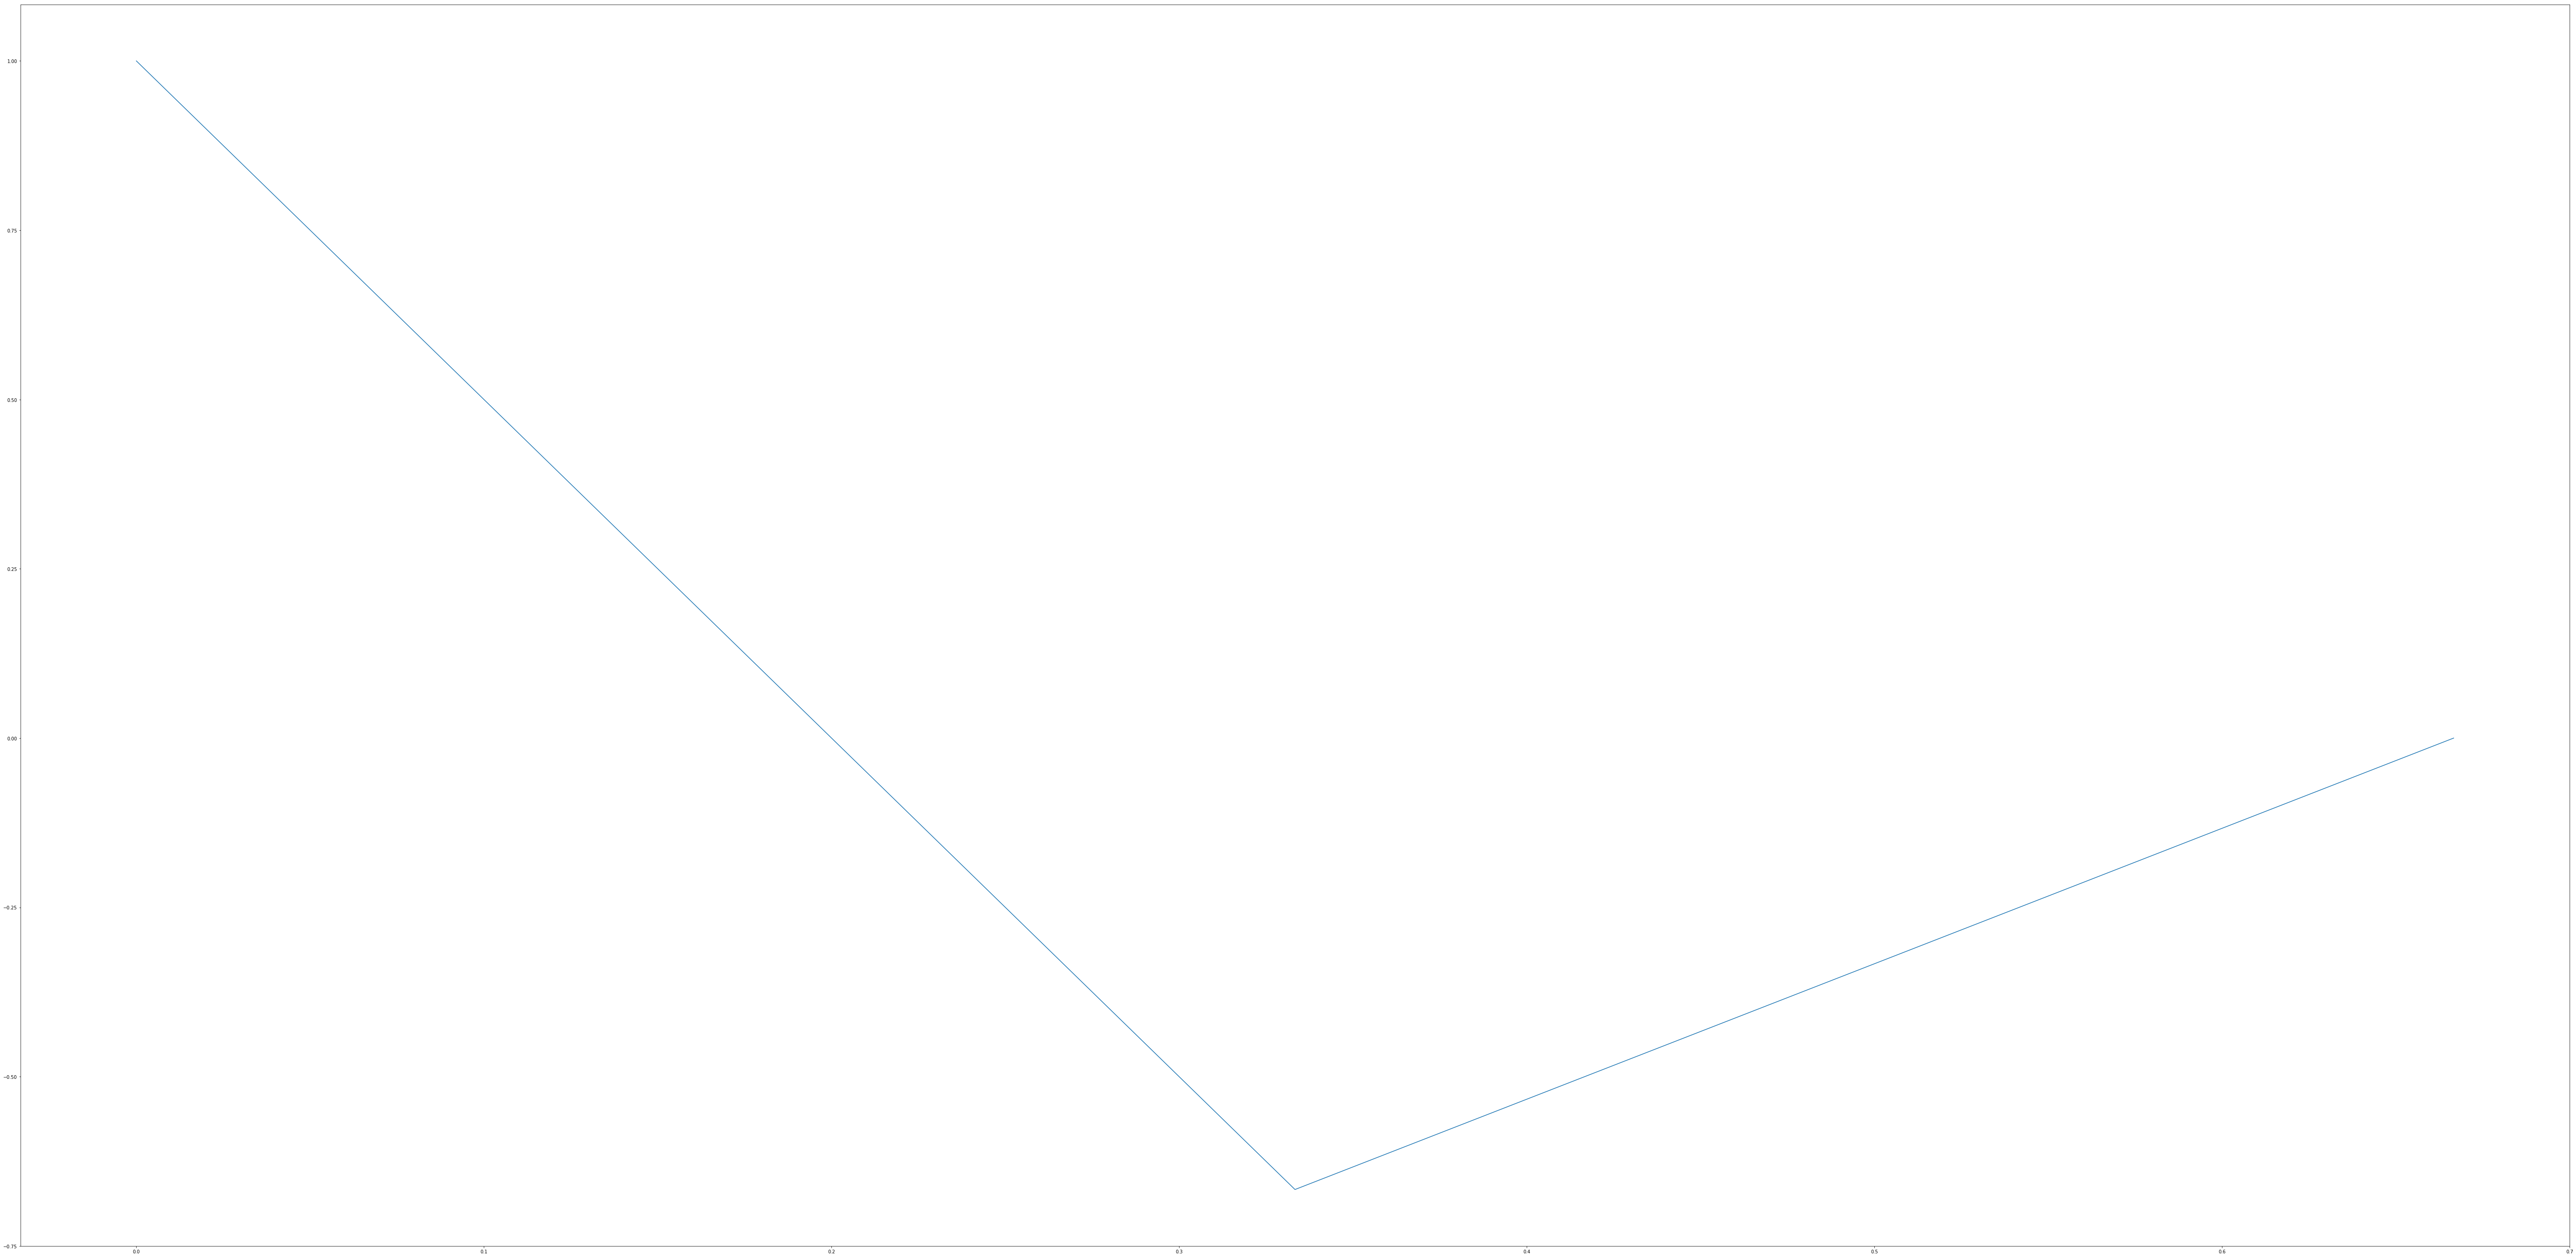

In [61]:
s=-5
y0 = np.asarray([1, s])
aux = solve_edo(h, my_fun, y0, T_l=0, T_r = 1, solver='euler')
print(aux)

L=100
plt.figure(figsize=(L,L/2))
plt.plot(np.arange(0, 1, h),aux[:,0],'-')

# TAREA 3
## Sección 1

1. Discretice la ecuación de calor mediante Diferencias Finitas. Para el tiempo, utilice un esquema explícito.

**R:**
Considerando que deberemos usar un esquema explicito para el tiempo, debemos usar central difference para aproximar las segundas derivadas parciales de las variables espaciales, y forward difference para la variable temporal.

Entonces vamos generando el esquema de diferencias finitas:

- central difference para segundas derivadas parciales de las variables espaciales
$$
    u_{xx} = \frac{u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}}{\Delta x^2}
$$

$$
    u_{yy} = \frac{u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t}}{\Delta y^2}
$$

- forward difference para la variable temporal

$$
    u_{t} = \frac{u_{x,y,t + \Delta t} - u_{x, y, t}}{\Delta t}
$$

Por lo tanto nuestra ecuacion original:

$$
    u_t = \sigma_x\,u_{xx} + \sigma_y\,u_{yy},
$$


queda discretizada mediante diferencias finitas de la siguiente forma:

$$
    \frac{u_{x,y,t + \Delta t} - u_{x, y, t}}{\Delta t} = \sigma_x \frac{u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}}{\Delta x^2} + \sigma_y \frac{u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t}}{\Delta y^2}
$$

Despejando la variable $u_{x,y,t}$ (que es lo que queremos obtener)tenemos:

$$
    u_{x,y,t + \Delta t} - u_{x, y, t} = 
    \frac{\Delta t \sigma_x}{\Delta x^2} (u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}) + 
    \frac{\Delta t \sigma_y}{\Delta y^2} (u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t})
$$

$$
    u_{x,y,t + \Delta t} = u_{x, y, t} + 
    \frac{\Delta t \sigma_x}{\Delta x^2} (u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}) + 
    \frac{\Delta t \sigma_y}{\Delta y^2} (u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t})
$$

En la pregunta 3, podrá ver un stencil de este acercamiento explicito, pero resulta evidente, que en cada paso, contamos con todos los valores necesarios, dados inicialmente por las condiciones de borde iniciales, y luego por las sucesivas iteraciones.


2. Implemente un algoritmo que encuentre el sector de la imagen que posee los *missing values*, donde la imagen es representada como una matriz de *numpy*. Los *missing values* serán identificados mediante el valor `NaN`. Su algoritmo debe retornar la posición en donde empiezan los *missing values* (coordenada superior izquierda), y el ancho y largo del sector de *missing values*. Considere que los agujeros siempre tendrán forma rectangular.

In [2]:
'''
Input:
image - (array) matrix form of image
Output:
start - (array) coordenates of hole's corner
width - (int) horizontal size of hole
lenght - (int) vertical size of hole
'''
def findHole(image, verbose=True):
    start=(0,0)
    width=0
    lenght=0
    y_len, x_len = np.shape(image)
    if verbose: print("Dimensiones de la imagen:{0}x{1}".format(x_len,y_len))
    result = np.asarray(np.where(np.isnan(image)))
    #dado qeu result contiene un arreglo con las posiciones de los valores nan, de la forma
    #result[0] -> coord. y
    #result[1] -> coord. x
    #entonces podemos ver el ancho y posicion inicial
    start  = (np.min(result[1]),np.min(result[0]))
    width  = np.max(result[1]) - np.min(result[1])
    lenght = np.max(result[0]) - np.min(result[0])
    if verbose: print("Start:{0} --- Width:{1} --- Length{2}".format(start, width, lenght))
    return start, width, lenght


A continuacion se presenta un widget que muestra posicion y caracteristicas del agujero, asi como tambien la imagen con agujero y la imagen original lado a lado. Esto con el proposito de facilitar la prueba de nuestro algoritmo findHole



In [3]:
# For npy files
def read_image_with_nan(path):
    return np.load(path, allow_pickle=True)
# For PNG files
def read_image(path):
    return imread(path, format='png')

def load_image(path):
    
    #seleccionamos las imagenes a cargar
    original = '{0}.png'.format(path)
    if path == 'wave': 
        with_nan = '{0}nan.npy'.format(path)
    else:
        with_nan = '{0}.npy'.format(path)
    
    #cargamos las imagenes y las dejamos en memoria.
    img_nan = read_image_with_nan(with_nan)
    img = read_image(original)
    
    fig = plt.figure(figsize=(20, 20))
    im1 = fig.add_subplot(2,2,1, title="With NaN")
    im1.imshow(img_nan, cmap='gray')
    im1 = fig.add_subplot(2,2,2, title="Original")
    im1.imshow(img, cmap='gray')

#imagenes cargadas, se descartó aquellas imagenes que tienen 3 dimensiones.
images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']

interact(load_image,path=images_list)

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.load_image(path)>

3. Notar que la ecuación de calor está definida para todo $t > 0$. Sin embargo, sabemos que al ser difusiva tendrá un estado estacionario. Implemente un algoritmo que construya los pixeles faltantes de una imagen mediante el método planteado. Su algoritmo debe recibir la imagen a reconstruir, la ubicación de los pixeles faltantes, el valor $\alpha$ de inicio para la condición inicial, el coeficiente de difusión $\sigma$ y el *timestep*. Su algoritmo debe iterar hasta que se llegue a un estado aproximadamente estacionario. Indique como estimará si se ha llegado o no a dicho estado y justifique su elección.

**R:**

Como criterio de parada, calcularemos la norma de frobenius de la diferencia  entre la imagen actual y la imagen anterior (es decir para $im_{t} - im_{t+1}$. Cuando esta norma sea cercana a cero (en realidad cuando sea menor a 10e-10), habremos llegado a un estado estacionario, consideraremos que este acercamiento, porque es una medida de la "distancia" o "diferencia" entre ambas matrices (cada una correspondiente a una imagen, en un tiempo y el siguiente).

En este punto, no consideraremos la condicion CFL para esquemas explicitos, dado que nos piden variar dt para poder generar este analisis. Incluiremos la condicion CFL en la seccion 2. Sin embargo se agregaron algunos print, para poder validar la condicion CFL y saber cuando está siendo violada y por ende el algoritmo podría ser inestable.

In [4]:
#codigo basado en los jupyter notebook del ramo. Puesto en las referencias.

# This is the 2D version of Explicit Finite Differences
def evolve2(u_new, u_old, sigmax, sigmay, dt, dx2, dy2):
    u_new[1:-1, 1:-1]  = u_old[1:-1, 1:-1] 
    u_new[1:-1, 1:-1] += sigmax * dt * (u_old[2:, 1:-1] - 2*u_old[1:-1, 1:-1] + u_old[:-2, 1:-1]) / dx2 
    u_new[1:-1, 1:-1] += sigmay * dt * (u_old[1:-1, 2:] - 2*u_old[1:-1, 1:-1] + u_old[1:-1, :-2]) / dy2
    return u_new

####################################################
# MAIN 2D-PARABOLIC FUNCTION SOLVER
####################################################
def solver2(u0, sigmax, sigmay, Nx=100, Ny=100, dt=1, verbose=True):
    dx = 1./Nx
    dy = 1./Ny
    dx2 = dx**2
    dy2 = dy**2
    max_num_steps = 10000
    
    # comprobamos que la condicion CFL
    #dt_ideal = 1.0*dx2*dy2 / ( 2*dx*dy*(dx2+dy2) )
    #dt_ideal = 1.0*dx2*dy2 / ( 2*(sigmax*dx2)+(sigmay*dy2) )
    cfl = ((sigmax*dt)/dx**2) + ((sigmay*dt)/dy**2)
    #print("El valor de dt entregado es: {0} -> cumple con la condicion CFL para sigmax = {1} - sigmay = {2}, que da un dt<= a {3}".format(dt, sigmax, sigmay, dt_ideal))
    if verbose: print("--------------")
    if cfl < 0.5:
        if verbose: print("El valor de CFL es : {0} < 0.5, por tanto el algoritmo es estable para dt={1}".format(cfl, dt))
    if cfl > 0.5:
        if verbose: print("El valor de CFL es : {0} > 0.5, por tanto el algoritmo es inestable para dt={1}".format(cfl, dt))
    u_aux = u0
    u = u_aux
    all_sims = np.zeros([10000, Nx, Ny])
    # Iterative step
    for n in range(max_num_steps): 
        u = evolve2(u, u_aux, sigmax, sigmay, dt, dx2, dy2)
        u_aux = u
        all_sims[n,:,:] = u
        if la.norm(all_sims[n,:,:]-all_sims[n-1,:,:], 'fro') < 10e-10:
            if verbose: print("detenido en la iteracion:{0}".format(n))
            return all_sims[:n,:,:]
    if verbose: print("detenido en la iteracion:{0}".format(10000))
    return all_sims

'''
Input:
image - (array) matrix form of image
start - (array) coordenates of hole's corner
width - (int) horizontal size of hole
lenght - (int) vertical size of hole
alpha - (float) A fixed value for initial condition
sigmax - (float) First difussion coefficient
sigmay - (float) Second difussion coefficient
dt - (float) time step
Output:
newImage - (array) matrix form of reconstructed image
'''
def fillHole(image, start, width, lenght, alpha, sigmax, sigmay, dt, verbose=True):
    newImage=image
    if verbose: print("Coordenadas X:{0}-{1} \nCoordenadas Y:{2}-{3}".format(start[0],start[0]+width, start[1],start[1]+lenght))
    
    #seleccionamos la imagen con sus condiciones de borde.
    image = image[start[1]-1:start[1]+lenght+2,start[0]-1:start[0]+width+2]
    
    #reemplazando valores NaN con el valor alpha entregado como parametro
    image[1:-1,1:-1] = alpha
    
    #aplicamos el solver
    Nx, Ny = np.shape(image)
    image = solver2(image, sigmax, sigmay, Nx, Ny, dt, verbose)
    
    #reemplazamos la aproximacion obtenida en la imagen original
    newImage[start[1]-1:start[1]+lenght+2,start[0]-1:start[0]+width+2] = image[-1,:,:]
    return newImage

4. Evalúe su implementación con los valores de $\sigma_x = \sigma_y = 1$ y $\alpha = 0$. Comente en función de los resultados obtenidos.

In [5]:
#cargamos las imagenes y las dejamos en memoria.
def aux(path, dt, alpha, sigmax, sigmay):
    #seleccionamos las imagenes a cargar
    if path == 'wave': 
        with_nan = '{0}nan.npy'.format(path)
    else:
        with_nan = '{0}.npy'.format(path)
    #cargamos la imagen con nan
    img_nan = read_image_with_nan(with_nan)#
    #obtenemos los datos del agujero
    start, width, lenght = findHole(img_nan, True)#
    #aplicamos el llenado del agujero
    img_filled = fillHole(img_nan, start, width, lenght, alpha, sigmax, sigmay, dt, True)
    
    fig = plt.figure(figsize=(20, 20))
    im1 = fig.add_subplot(2,2,1, title="Filled")
    im1.imshow(img_filled, cmap='gray')
    img_nan = read_image_with_nan(with_nan)
    im1 = fig.add_subplot(2,2,2, title="With NaN")
    im1.imshow(img_nan, cmap='gray')

images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']
list_of_dt = [0.1,0.01,0.001,0.0008,0.0007,0.0006,0.0005,0.0004,0.0003,0.0002,0.0001,0.00001,0.000001]
interact(aux,path=images_list, dt=list_of_dt,alpha=fixed(0), sigmax=fixed(1), sigmay=fixed(1))

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.aux(path, dt, alpha, sigmax, sigmay)>

#### Conclusiones:

Como principales comentarios podemos destacar lo siguiente:


- Como podemos ver la condicion CFL da una medida util para validar si nuestro algoritmo funcionará correctamente o no, dado un cierto dt. Variando los valores de $\sigma_x$ y $\sigma_y$ tambien deberemos ajustar el valor $dt$ de manera que se mantenga constante bajo 0.5 la condicion CFL. Podemos notar que para valores muy cercanos a 0.5 tambien funciona, sin embargo que esté bajo el 0.5 asegura el funcionamiento. Esto se debe a que la condicion CFL, asegura un rango de valores de dt, para el cual el algoritmo explicito se mantiene estable, cuando está fuera (es decir, cuando es mayor a 0.5) podemos ver inestabilidad, y por tanto el llenado de la imagen, se comporta de manera inesperada. 


- Mas aun, para valores de timestep, muy bajos, del orden de 10e-6, tambien tenemos un comportamiento inesperado. Posiblemente este comportamiento se deba a que para valores muy pequeños de timestep, el cambio de la funcion es muy pequeño para un x,y determinado, y por tanto se producen operaciones aritmeticas entre numeros muy parecidos, lo que puede llevar a errores de aproximacion decimal.


- Además del analisis anterior, podemos notar que cuandno el solver cae en inestabilidad, completaremos el limite de 10.000 iteraciones, sin llegar a un estado estacionario, dado que el algoritmo no se está comportando de forma correcta, y por tanto no está evolucionando naturalemente en el tiempo, y no podrá llegar a un estado estacionario.

## Sección 2

1. Aplique su algoritmo de la Sección 1 para distintos valores de $\sigma_x$, $\sigma_y$, $\alpha$ y *timestep*. Concluya al respecto. Recuerde considerar la estabilidad en la variación de los valores de $\sigma_x$ y $\sigma_y$.


In [9]:
images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']
list_of_dt = [0.1,0.01,0.001,0.0008,0.0007,0.0006,0.0005,0.0004,0.0003,0.0002,0.0001,0.00001,0.000001]
#dado que alfa representa un pixel, tiene que tener un valor entre 0 y 1
sigmax_ = []

interact(aux, path=images_list, dt=list_of_dt, alpha=0.0, sigmax=1.0, sigmay=1.0)

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.aux(path, dt, alpha, sigmax, sigmay)>

#### Conclusiones:

Como principales comentarios podemos destacar lo siguiente:


- Para mantener una condicion de estabilidad, ante la variacion de cualquier de los valores sigmas, el timestep debe ajustarse.


- Para valores de timestep muy bajos, del orden de 10e-6, tambien tenemos un comportamiento inesperado. Esto no parece deberse a inestabilidad, dado que los valores se mantienen por debajo del numero CFL, incluso ajustando los sigmas (para compensar). Posiblemente este comportamiento se deba a que para valores muy pequeños de timestep, el cambio de la funcion es muy pequeño para un x,y determinado, y por tanto se producen operaciones aritmeticas entre numeros muy parecidos, lo que puede llevar a errores de aproximacion decimal.


- Además del analisis anterior, podemos notar que cuandno el solver cae en inestabilidad, completaremos el limite de 10.000 iteraciones, sin llegar a un estado estacionario, dado que el algoritmo no se está comportando de forma correcta, y por tanto no está evolucionando naturalemente en el tiempo, y no podrá llegar a un estado estacionario.


- Nuestro Alpha (valor inicial) influirá en la cantidad de iteraciones que deberán hacerse para poder llegar a un estado estacionario. Mientras mas parecido a los bordes, mas facil será llegar a un estado estacionario, y por tanto se realizarán menos iteraciones. Sin embargo, este valor no afecta la estabilidad del algoritmo. 


- El aumento de cualquiera de los dos valores sigmas, aumentará necesariamente el valor de nuestro CFL, y para compensar, necesariamente habrá que disminuir el timestep.

2. Utilice la *Normal de Frobenius* para medir el error entre la imagen con *inpainting* y la imagen original. Mida el error para distintos valores de $\sigma_x$, $\sigma_y$, $\alpha$ y *timestep*. Concluya al respecto.

**R:**

Considerando que tenemos mas de dos variables que pueden ir variando, para poder analizar consideraré mi eje X como el dt (variacion del tiempo), y el error como el eje y, variando $\sigma_x$, $\sigma_y$ y $\alpha$, en un grafico de error versus dt. Consideraremos una medida del error, como ||image_filled - image_original|| usando la norma de frobenius.

Dado que para ciertas combinaciones de valores, el solver caerá en inestabilidad, entonces reemplazaré esos valores NaN con un error grande para poder apreciar las diferencias, y entender los rangos de dt, en el cual el error tiende a cero.

In [6]:
#cargamos las imagenes y las dejamos en memoria.
def aux2(path, alpha, sigmax, sigmay):
    verbose=False
    #seleccionamos las imagenes a cargar
    if path == 'wave': 
        with_nan = '{0}nan.npy'.format(path)
    else:
        with_nan = '{0}.npy'.format(path)
    #cargamos la imagen con nan
    img_nan = read_image_with_nan(with_nan)#
    img_or = read_image("{}.png".format(path))
    #obtenemos los datos del agujero
    start, width, lenght = findHole(img_nan, verbose)#
    #aplicamos el llenado del agujero
    dt = [0.000001, 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.001, 0.01, 0.1]
    #dt = np.linspace(0.00001, 0.01, 100)
    error = []
    for aux in dt:
        img_filled = fillHole(img_nan, start, width, lenght, alpha, sigmax, sigmay, aux, verbose)
        error_aux = np.linalg.norm(img_or - img_filled, 'fro')
        #ajusto artificialmente el error para propositos de analisis
        if np.isnan(error_aux): error_aux = 10
        error.append(error_aux)
        
    print("dt: {0}".format(dt))
    print("error: {0}".format(error))
    plt.plot(dt, error, '-o')
    plt.xlabel("dt", fontsize=20)
    plt.ylabel("error", fontsize=20)
    plt.xlim((min(dt), max(dt)))
    plt.xscale('log')
    plt.show()

images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']
list_of_dt = [0.0005,0.0004,0.0003,0.0002,0.0001,0.00001,0.000001]
sigmax_ = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
sigmay_ = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#dado que alfa representa un pixel, tiene que tener un valor entre 0 y 1

interact(aux2, path=images_list, alpha=0.0, sigmax=sigmax_, sigmay=sigmay_)

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.aux2(path, alpha, sigmax, sigmay)>

#### Conclusiones:

Como principales comentarios podemos destacar lo siguiente:

- Podemos ver que para un cierto rango de dt, el algoritmo puede enncontrar una solucion sin caer en errores tener un alto grande de error, es decir, es capaz de llegar a una buena aproximacion de la imagen original. 

- Al tener un timestep muy pequeño, tendremos errores de aproximacion decimal al operar sobre valores muy parecido. 

- Al tener valores muy grandes de timestep tendremos un numero CFL mayor a 0.5 y por tanto el algoritmo será inestable.

- El variar cualquier de los sigmas, desplaza el intervalo de dt, en el cual los errores respecto de la imagen original se son pequeños (intervalo en el cual tenemos estabilidad y una buena aproximacion). Un ejercicio interesante, sería mantener constante la cantidad de pasos en el tiempo, para ver como varían los valores.

3. Proponga un algoritmo que permita *optimizar* el valor de $\sigma_x$ y $\sigma_y$ respecto a la norma de Frobenius. Para esta sección elija un valor de $\alpha$ fijo, en función de los experimentos realizados en las preguntas 1 y 2 de la sección 2. Su algoritmo debe *optimizar* utilizando las imágenes dentro de la carpeta `train_images`. Una vez obtenidos los valores de $\sigma_x$ y $\sigma_y$, evalúe el desempeño con las imágenes de `train_images`. Comente y concluya en función de sus resultados.

**R:**

De acuerdo a los valores obtenidos en los experimentos previos, podemos apreciar que para un cierto dt = [ 0.00001, 0.000001] tendremos un algoritmo estable para todas las fotografías (descartadas las que tenian 3d), por tanto elegiremos dt = 0.00001, dado que 0.000001 ya comienza a presentar errores (posiblemente por errores de aproximacion decimal, por operar sobre numeros muy parecidos)


In [39]:
A = np.ones((6,24))
A_nan = A
A_nan[1:-1,1:-1] = np.nan
def norma_frob(sigma):
        #cargamos las imagenes en memoria
        image = 'wave'
        img_nan = read_image_with_nan('{0}nan.npy'.format(image))
        img_ori = read_image('{0}.png'.format(image))
        #img_nan = A_nan
        #img_ori = A
        #encontramos posicion del agujero para entregarselo a la funcion que hace el llenado
        start, width, lenght = findHole(img_nan, False)
        #start = (1,1)
        #width = 5
        #lenght = 5
        #print("{0}------{1}_-----{2}".format(start, width, lenght))
        
        #elegimos un alpha fijo como un punto medio entre el valor maximo y minimo -> 0.5
        alpha   = 1
        sigmax  = sigma[0]
        sigmay  = sigma[1]
        #sabemos que con un valor de dt 
        dt      = 0.00001
        img_filled = fillHole(img_nan, start, lenght,width,alpha, sigmax, sigmay, dt, False)
        #calculamos la norma de frobenius
        norm_frob = np.linalg.norm(img_ori - img_filled, 'fro')
        return norm_frob


#seleccionaremos un sigmax y sigmay como initial guess, y dejaremos que la funcion de scipy nos entregue valores de
#sigmax y sigmay que minimizen la norma de frobenius entre la imagen ajustada y la imagen original
sigmax = .5
sigmay = .5
#cargamos la image
sigma = np.array([sigmax, sigmay])

#resultado de optimizacion, solo mostramos si ha tenido exito
result = optimize.fmin(norma_frob, sigma)
#result = optimize.minimize(norma_frob, sigma, method="CG")

print(result)

[0.5 0.5]


In [21]:

print(A)


[[1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1.]]


Podemos ver que mi algoritmo tarde mucho en ser ejecutado. La idea original era encontrar sigmax y sigmay optimos para cada imagen y luego obtener un promedio entre todos. Posteriormente se aplicarían en el test image. Esto puede deberse a los siguientes motivos:

- A que mi algoritmo itera hasta llegar a un estado estacionario (es decir, para cada sigmax y sigmay, podrá hacer diferente cantidad de pasos en el tiempo (iteraciones) antes de llegar a un estado estacionario y tener un error minimo y por tanto caerá en la inestabilidad segun el algoritmo vaya variando valores para los sigmas.

-  Que para los parametros entregados, el estado estacionario tarde mucho en ser alcanzado cada vez, por tanto sigue corriendo.

Algunas alternativas habrían sido calcular el dt, dinamicamente, hacer que descarten los valores cuando se caiga en inestabilidad, o bien hacer el mismo ejercicio, con un esquema implicito.

## Sección 3

1. Discretice la ecuación de calor para usarla en este problema, usando un esquema implícito. Incluya una imagen de los stencil explícitos e implícitos y comparelos.

**R:**
Considerando que deberemos usar un esquema implicito para el tiempo, debemos usar central difference para aproximar las segundas derivadas parciales de las variables espaciales, y backward difference para la variable temporal.

Entonces vamos generando el esquema de diferencias finitas:

- central difference para segundas derivadas parciales de las variables espaciales
$$
    u_{xx} = \frac{u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}}{\Delta x^2}
$$

$$
    u_{yy} = \frac{u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t}}{\Delta y^2}
$$

- Backward difference para la variable temporal, lo cual nos entregará un esquema implicito:

$$
    u_{t} = \frac{u_{x,y,t} - u_{x, y, t - \Delta t}}{\Delta t}
$$

Por lo tanto nuestra ecuacion original:

$$
    u_t = \sigma_x\,u_{xx} + \sigma_y\,u_{yy},
$$


queda discretizada mediante diferencias finitas de la siguiente forma:

$$
     \frac{u_{x,y,t} - u_{x, y, t - \Delta t}}{\Delta t} = \sigma_x \frac{u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}}{\Delta x^2} + \sigma_y \frac{u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t}}{\Delta y^2}
$$

Despejando la variable $u_{x,y,t}$ (que es lo que queremos obtener)tenemos:


$$
    u_{x,y,t} - u_{x, y, t - \Delta t} = 
    \frac{\Delta t \sigma_x}{\Delta x^2} (u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}) + 
    \frac{\Delta t \sigma_y}{\Delta y^2} (u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t})
$$


$$
    u_{x, y, t - \Delta t} = u_{x,y,t} -
    \frac{\Delta t \sigma_x}{\Delta x^2} (u_{x + \Delta x,y,t} - 2 u_{x,y,t} + u_{x- \Delta x,y,t}) - 
    \frac{\Delta t \sigma_y}{\Delta y^2} (u_{x,y + \Delta y,t} - 2 u_{x,y,t} + u_{x,y - \Delta y,t})
$$


Otra forma de ver lo anterior, es verlo en relacion a $t + \Delta t$, de la siguiente manera (para $n \leq 0$):


$$
    u_{x, y, t} = u_{x,y,t + \Delta t} -
    \frac{\Delta t \sigma_x}{\Delta x^2} (u_{x + \Delta x,y,t + \Delta t} - 2 u_{x,y,t + \Delta t} + u_{x- \Delta x,y,t + \Delta t}) - 
    \frac{\Delta t \sigma_y}{\Delta y^2} (u_{x,y + \Delta y,t + \Delta t} - 2 u_{x,y,t + \Delta t} + u_{x,y - \Delta y,t + \Delta t})
$$


es decir, tendremos un punto conocido en el tiempo actual, y 5 puntos desconocidos, para los cuales plantearemos el sistema lineal a resolver. De esta manera, en comparacion con una matriz tridiagonal que tenemos para el caso de 1d, ahora tendremos una matriz pentadiagonal.

finalmente, consideremos la siguiente equivalencia, a reflejar en nuestro codigo:


$$ 
\frac{\Delta t \sigma_x}{\Delta x^2} = D_x
$$ 


$$ 
\frac{\Delta t \sigma_y}{\Delta y^2} = D_y
$$ 


$$ 
    (1 + 2 D_x + 2 D_y) = \lambda
$$ 

Con lo cual nuestra ecuacion quedaría:

$$
    u_{x, y, t} = \lambda u_{x,y,t + \Delta t} - 
    D_x (u_{x + \Delta x,y,t + \Delta t}  + u_{x- \Delta x,y,t + \Delta t}) -
    D_y (u_{x,y + \Delta y,t + \Delta t}  + u_{x,y - \Delta y,t + \Delta t})
$$



Los stencil de cada acercamiento son (los subindices están en forma de i, j, n = x, y, t)

- Explicito: el siguiente stencil muestra un esquema de forward differences


<img src="./stencil_forward.png" alt="drawing" style="width:350px;"/>


- Implicito: el siguiente stencil muestra un esquema de backward differences


<img src="./stencil_backward.png" alt="drawing" style="width:350px;"/>

A partir de los stencil podemos notar que en el esquema explicito no es necesario resolver un sistema, ya que la incognita es solo una en cada paso. Pero por otro lado en el esquema implicito, tenemos incognitas que están entreladas entre si, por tanto es necesario resolver un sistema cada vez. POr supuesto, de la mano con este costo computacional mayor, tenemos un algoritmo incondicionalmente estable.

2. Modifique el código desarrollado en la pregunta 3 de la sección anterior para que reconstruya la imagen usando un esquema implícito. 

Podemos ver del despeje de la formula de diferencias finitas con backward difference, que el resultado será una matriz pentadiagonal, dado esto, la principal dificultad del problema es plantear la matriz para el sistema lineal.

In [8]:
#codigo basado en los jupyter notebook del ramo. Puesto en las referencias.

# This is the 2D version of Explicit Finite Differences
def evolve2(u_new, u_old, sigmax, sigmay, dt, dx2, dy2):
    u_new[1:-1, 1:-1]  = u_old[1:-1, 1:-1] 
    u_new[1:-1, 1:-1] += sigmax * dt * (u_old[2:, 1:-1] - 2*u_old[1:-1, 1:-1] + u_old[:-2, 1:-1]) / dx2 
    u_new[1:-1, 1:-1] += sigmay * dt * (u_old[1:-1, 2:] - 2*u_old[1:-1, 1:-1] + u_old[1:-1, :-2]) / dy2
    return u_new


####################################################
# MAIN 2D-PARABOLIC FUNCTION SOLVER
####################################################
def solver_implicit(u0, sigmax, sigmay, Nx=100, Ny=100, dt=1, verbose=True):
    dx = 1./Nx
    dy = 1./Ny
    dx2 = dx**2
    dy2 = dy**2 
    max_num_steps = 10000
    
    #creamos estas variables para no estar haciendo estos calculos cada vez
    D_x = (dt*sigmax)/dx2
    D_y = (dt*sigmay)/dy2
    lambd = 1 + 2*D_x + 2*D_y
    
    #construimos la matriz A
    #for j in range((width+2)*(length+2)):
    #    i = j%(length+2)
    #    k = int(j/length+2)
    #    A[j][i+1+(k*lenght+2)] = -D_y
    #    A[j][i-1+(k*lenght+2)] = -D_y
    #    A[j][i+((k+1)*lenght+2)] = -D_x
    #    A[j][i+((k-1)*lenght+2)] = -D_x
    #    A[j][j] = lambd
    #print(A)
    
    # comprobamos que la condicion CFL
    #dt_ideal = 1.0*dx2*dy2 / ( 2*dx*dy*(dx2+dy2) )
    #dt_ideal = 1.0*dx2*dy2 / ( 2*(sigmax*dx2)+(sigmay*dy2) )
    cfl = ((sigmax*dt)/dx**2) + ((sigmay*dt)/dy**2)
    #print("El valor de dt entregado es: {0} -> cumple con la condicion CFL para sigmax = {1} - sigmay = {2}, que da un dt<= a {3}".format(dt, sigmax, sigmay, dt_ideal))
    if verbose: print("--------------")
    if cfl < 0.5:
        if verbose: print("El valor de CFL es : {0} < 0.5, por tanto el algoritmo es estable para dt={1}".format(cfl, dt))
    if cfl > 0.5:
        if verbose: print("El valor de CFL es : {0} > 0.5, por tanto el algoritmo es inestable para dt={1}".format(cfl, dt))
    u_aux = u0
    u = u_aux
    all_sims = np.zeros([10000, Nx, Ny])
    # Iterative step
    for n in range(max_num_steps): 
        #en este paso deberemos resolver un sistema lineal.
        u = evolve2(u, u_aux, sigmax, sigmay, dt, dx2, dy2)
        u_aux = u
        all_sims[n,:,:] = u
        if la.norm(all_sims[n,:,:]-all_sims[n-1,:,:], 'fro') < 10e-10:
            if verbose: print("detenido en la iteracion:{0}".format(n))
            return all_sims[:n,:,:]
    return all_sims

'''
Input:
image - (array) matrix form of image
start - (array) coordenates of hole's corner
width - (int) horizontal size of hole
lenght - (int) vertical size of hole
alpha - (float) A fixed value for initial condition
sigmax - (float) Fist difussion coefficient
sigmay - (float) Second difussion coefficient
dt - (float) time step
Output:
newImage - (array) matrix form of reconstructed image
'''
def fillHoleImplicit2(image, start, width, lenght, alpha, sigmax, sigmay, dt, verbose):
    newImage=image
    if verbose: print("Coordenadas X:{0}-{1} \nCoordenadas Y:{2}-{3}".format(start[0],start[0]+width, start[1],start[1]+lenght))
    
    #seleccionamos la imagen con sus condiciones de borde.
    image = image[start[1]-1:start[1]+lenght+2,start[0]-1:start[0]+width+2]
    
    #reemplazando valores NaN con el valor alpha entregado como parametro
    image[1:-1,1:-1] = alpha
    
    #aplicamos el solver
    Nx, Ny = np.shape(image)
    image = solver_implicit(image, sigmax, sigmay, Nx, Ny, dt, verbose)
    #image = solver(image, sigmax, sigmay, Nx, Ny, 10000)
    
    #reemplazamos la aproximacion obtenida en la imagen original
    newImage[start[1]-1:start[1]+lenght+2,start[0]-1:start[0]+width+2] = image[-1,:,:]
    return newImage

In [17]:
'''
Input:
image - (array) matrix form of image
start - (array) coordenates of hole's corner
width - (int) horizontal size of hole
lenght - (int) vertical size of hole
alpha - (float) A fixed value for initial condition
sigmax - (float) Fist difussion coefficient
sigmay - (float) Second difussion coefficient
dt - (float) time step
Output:
newImage - (array) matrix form of reconstructed image
'''
def fillHoleImplicit(image, start, width, lenght, alpha, sigmax, sigmay, dt):
    newImage=np.copy(image)
    dx = 1/(width+1)
    dy = 1/(lenght+1)
    a = sigmax*dt/dx**2
    b = sigmay*dt/dy**2
    
    A = np.zeros([(width+2)*(lenght+2), (width+2)*(lenght+2)])
    B = np.zeros([(width+2)*(lenght+2),1])
    bordes = B.copy()
    Breal= B.copy()
    
    for i in range(start[0],start[0]+lenght):
        for k in range(start[1],start[1]+width):
            newImage[i][k] = alpha
            
    for i in range(width+2):
        for k in range(lenght+2):
            j = k+i*(lenght+2)
            B[j] = newImage[start[1]-1+k][start[0]-1+i]
            Breal[j] = image[start[1]-1+k][start[0]-1+i]
            if i == 0 or i == width+1 or k == 0 or k == lenght+1:
                bordes[j] = newImage[start[1]-1+k][start[0]-1+i]

    for j in range((width+2)*(lenght+2)):
        if(bordes[j] == 0):
            i = j%(lenght+2)
            k = int(j/(lenght+2))
            A[j][i+1+(k*(lenght+2))] = -b 
            A[j][i-1+(k*(lenght+2))] = -b 
            A[j][i+(k+1)*(lenght+2)] = -a 
            A[j][i+(k-1)*(lenght+2)] = -a 
            A[j][j] = 1 + 2*sigmax*dt/dx**2 + 2*sigmay*dt/dy**2
        else:
            A[j][j] = 1
    
    i = 0
    tolx = 1e-06
    toly = 1e-09
    while True:
        auxB = B.copy()
       
        B = np.linalg.solve(A, B)
        diff = np.linalg.norm(B - auxB)
        i+=1
        if np.allclose(auxB, B, tolx, toly):
            print("Itera ", i)
            break
    k = 0   
    for i in range(start[0],start[0]+lenght):
        for j in range(start[1],start[1]+width):
            newImage[i][j] = B[k]
            k+=1 
    return newImage

In [18]:
#cargamos las imagenes y las dejamos en memoria.
def aux(path, dt, alpha, sigmax, sigmay):
    #seleccionamos las imagenes a cargar
    if path == 'wave': 
        with_nan = '{0}nan.npy'.format(path)
    else:
        with_nan = '{0}.npy'.format(path)
    #cargamos la imagen con nan
    img_nan = read_image_with_nan(with_nan)#
    #obtenemos los datos del agujero
    start, width, lenght = findHole(img_nan, True)#
    #aplicamos el llenado del agujero
    img_filled = fillHoleImplicit(img_nan, start, width, lenght, alpha, sigmax, sigmay, dt)
    
    fig = plt.figure(figsize=(20, 20))
    im1 = fig.add_subplot(2,2,1, title="Filled")
    im1.imshow(img_filled, cmap='gray')
    img_nan = read_image_with_nan(with_nan)
    im1 = fig.add_subplot(2,2,2, title="With NaN")
    im1.imshow(img_nan, cmap='gray')

images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']
list_of_dt = [0.1,0.01,0.001,0.0008,0.0007,0.0006,0.0005,0.0004,0.0003,0.0002,0.0001,0.00001,0.000001]
interact(aux,path=images_list, dt=list_of_dt,alpha=fixed(0), sigmax=fixed(1), sigmay=fixed(1))

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.aux(path, dt, alpha, sigmax, sigmay)>

3. Utilice la *Normal de Frobenius* para medir el error entre la imagen con *inpainting* y la imagen original. Mida el error para distintos *timestep*. Concluya en función de los resultados y en comparación con el uso de un método explícito.

**R:**

Considerando que tenemos mas de dos variables que pueden ir variando, para poder analizar consideraré mi eje X como el dt (variacion del tiempo), y el error como el eje y, variando $\sigma_x$, $\sigma_y$ y $\alpha$, en un grafico de error versus dt. Consideraremos una medida del error, como ||image_filled - image_original|| usando la norma de frobenius.

Dado que nuestro esquema es implicito, no tendremos condicion CFL, que cumplir para asegurar estabilidad, podremos probar para cualquier dt, asi que no consideraremos ningun reemplazo en dichos casos.

In [16]:
#cargamos las imagenes y las dejamos en memoria.
def aux_implicit(path, alpha, sigmax, sigmay):
    verbose=False
    #seleccionamos las imagenes a cargar
    if path == 'wave': 
        with_nan = '{0}nan.npy'.format(path)
    else:
        with_nan = '{0}.npy'.format(path)
    #cargamos la imagen con nan
    img_nan = read_image_with_nan(with_nan)#
    img_or = read_image("{}.png".format(path))
    #obtenemos los datos del agujero
    start, width, lenght = findHole(img_nan, verbose)#
    #aplicamos el llenado del agujero
    dt = [0.000001, 0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.001, 0.01, 0.1]
    #dt = np.linspace(0.00001, 0.01, 100)
    error = []
    for aux in dt:
        img_filled = fillHoleImplicit(img_nan, start, width, lenght, alpha, sigmax, sigmay, aux, verbose)
        error_aux = np.linalg.norm(img_or - img_filled, 'fro')
        #ajusto artificialmente el error para propositos de analisis
        #if np.isnan(error_aux): error_aux = 10
        error.append(error_aux)
        
    print("dt: {0}".format(dt))
    print("error: {0}".format(error))
    plt.plot(dt, error, '-o')
    plt.xlabel("dt", fontsize=20)
    plt.ylabel("error", fontsize=20)
    plt.xlim((min(dt), max(dt)))
    plt.xscale('log')
    plt.show()

images_list = ['wave','test_images\im1','test_images\im2','train_images\im2','train_images\im4']
list_of_dt = [0.0005,0.0004,0.0003,0.0002,0.0001,0.00001,0.000001]
sigmax_ = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
sigmay_ = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#dado que alfa representa un pixel, tiene que tener un valor entre 0 y 1

interact(aux_implicit, path=images_list, alpha=0.0, sigmax=sigmax_, sigmay=sigmay_)

interactive(children=(Dropdown(description='path', options=('wave', 'test_images\\im1', 'test_images\\im2', 't…

<function __main__.aux_implicit(path, alpha, sigmax, sigmay)>

# tarea1

Consideremos una matriz $A \in \mathbb{R}^{n \times n}$ simétrica cuyos valores propios son $\lambda_i$ (por simplicidad, consideraremos que también son todos positivos) y sus vectores propios son $\mathbf{v}_i$, para $i \in \{1, 2, \dots, n\}$. Considere además que $\lambda_i > \lambda_j$, para todo $i < j$, es decir, los valores propios están ordenados. Considere ahora la matriz $A_1$ definida como:

$$
    A_1 = A - \lambda_1\mathbf{v}_1\,\mathbf{v}_1^T.
$$
**1. (5 puntos)** Demuestre que los vectores propios de $A$ también son los vectores propios de $A_1$. ¿Cuáles son los valores propios de $A_1$?

Consideremos el hecho de que los valores propios estan ordenados y que estamos operando con matrices simetricas, tomemos el vector propio dominante de A y multipliquemoslo por $A_1$:

$A_1 v_{1} = (A − \lambda_{1} v_{1} v_{1}^{T})v_{1}$

$A_1 v_{1} = A v_{1} − \lambda_{1} v_{1} v_{1}^{T} v_{1}$
$A_1 v_{i} = \lambda_{1} v_{i} − \lambda_{1} v_{1} v_{1}^{T} v_{1}$

Pero sabemos que $v_{1}^{T} v_{1} = 1$, entonces
$A_1 v_{i} = \lambda_{1} v_{1} v_{1}^{T})v_{1}$

Por tanto podemos notar que el valor propio asociado a $v_1$ es cero. Por no tanto no es su valor propio dominante como ocurría con A.

Ahora consideremos un vector cualquiera v, con v distinto de $v_1$:

$A_1 v = (A − \lambda_{1} v_{1} v_{1}^{T})v$

$A_1 v = A v − \lambda_{1} v_{1} v_{1}^{T} v $

$A_1 v = \lambda v − \lambda_{1} v_{1} v_{1}^{T} v$

Pero sabemos que $v_{1}^{T} v= 0$, entonces
$A_1 v = \lambda v$

de esta manera podemos ver que el vector v es vector propio de $A_1$ con valor propio asociado $\lambda$, por tanto $A_1$ tienen los mismos valores propios y y vectores que A, con excepcion de $\lambda_1=0$ que implica que el valor dominante de $A_1$ es $\lambda_2 $ y el vector propio dominante es $v_2$

**2. (10 puntos)** El proceso anterior, denominado *Deflation*, puede repetirse iterativamente para construir un algoritmo iterativo que permita encontrar los valores y vectores propios en sucesión. El algoritmo, paso a paso, puede definirse como:

1. Se define $A_0 = A$, $\lambda_0 = 0$ y $\mathbf{v}_0 = \mathbf{0}$.
2. Para $i \in \{1, 2, \dots, n\}$
    1. Se define $A_i = A_{i-1} - \lambda_{i-1}\mathbf{v}_{i-1}\,\mathbf{v}_{i-1}^T$.
    2. Se encuentra el valor y vector propio dominante de $A_{i}$, denotados por $\lambda_{i}$ y $\mathbf{v}_{i}$, respectivamente.
3. Se retorna el conjunto $\{\lambda_1, \lambda_2, \dots, \lambda_n\}$ y $\{ \mathbf{v}_{1}, \mathbf{v}_{2}, \dots, \mathbf{v}_{n}\}$.

Implemente la función `deflation`, el cual aplicará el algoritmo *Deflation* mediante el uso de *Power Iteration*. Esta función debe recibir como parámetros:
* La matriz $A$.
* Un *initial guess* $\mathbf{x}_0$.
* Un número de iteraciones.

La función debe retornar una lista con los valores propios encontrados y una lista de los vectores propios encontrados.


In [1]:
'''
    Program 12.1 Power iteration
    Computes dominant eigenvector of square matrix
    Input: matrix A, initial (nonzero) vector x, number of steps k
    Output: dominant eigenvalue lam, eigenvector u
'''
def power_iteration(A, x, k, verbose=False):
    if verbose: print("Power Iteration Method\n%s"%('='*80))
    for j in range(k):
        u = x/norm(x)
        x = np.dot(A, u)
        lam = np.dot(u, x) #not really necessary to compute it at each iteration
        if verbose: print("k=%d, lambda=%+.3f, u=%s"%(j,lam,str(u.T)))
    u = x/norm(x)
    if verbose: print("k=%d, lambda=%+.3f, u=%s\n"%(j+1,lam,str(u.T)))
    return lam, u 

'''
Given a list of n real vaues, returns a symmetric matrix whose eigenvalues are the given values.
Input:
eig_values - (list) list of n real values that will be used as eigenvalues
Output: 
A - (n x n matrix) A symmetric matrix whose eigenvalues equals the values in eig_values list
Q - (n x n matrix) An orthonormal matrix whose columns are the eigenvectors
eig_values (list) A list with eigenvalues of A. It is the same list given as input.
'''
def generate_matrix(eig_values):
    n = len(eig_values)
    Q, _ = np.linalg.qr(np.random.rand(n, n))
    L = np.diag(eig_values)
    A = np.dot(Q, np.dot(L, Q.T))
    return A, Q, eig_values

'''
Compute all the eigenvalues and eigenvectors using Deflation procedure.
Input:
A - (n x n matrix) Matrix to compute its eigenvalues and eigenvectors
x0 - (array) Initial guess for Power Iteration
it - (integer) Number of iteration for Power Iteration.
Output:
eig_values - (list) A list with the eigenvalues found by the algorithm
eig_vectors - (list) A list with the eigenvectors found by the algorithm
'''
def deflation(A, x0, it):
    #valores iniciales
    A_i = A
    lambd_i = 0
    v_i = np.zeros(np.shape(A)[0])
    #variables para ir almacenando eigenvalues y eigenvectors
    eig_values = []
    eig_vectors = []
    for a in range(np.shape(A)[0]):
        #utilizamos power iteration para 
        eig_value_, eig_vector_ = power_iteration(A_i, x0, it, verbose=False)
        eig_values.append(eig_value_)
        eig_vectors.append(eig_vector_)
        lambd_i = eig_value_
        v_i = eig_vector_
        aux = np.outer(np.dot(lambd_i,v_i), np.transpose(v_i))
        A_i = A_i - aux
    return eig_values, eig_vectors

Genere matrices con los siguientes valores propios:
* $\{1, 2, \dots, 10\}$.
* $\{2, 2^2, 2^3, \dots, 2^{12}\}$.

Utilice las matrices generadas para probar su algoritmo. Su tarea será probada con otras matrices, pero puede utilizar estas para verificar la correctitud de su algoritmo.

In [2]:
it = 1000

#primer caso 
N = 10
x0 = np.ones(N)
#creacion de matriz con valores propios {1, 2, 4, ...., 10}
eigenvalues = [i+1 for i in range(N)]
A, Q, aux = generate_matrix(eigenvalues1)
#calculo mediante deflation
eigenvalues_defl, eigenvectors_defl = deflation(A, x0, it)
print("Original Eigenvalues: {}\nEigenvalues Calculated with deflation: {}\n".format(eigenvalues, [round(temp,2)for temp in eigenvalues_defl]))

#segundo caso
N = 12
x0 = np.ones(N)
#creacion de matriz con valores propios {2^1, 2^2, 2^3, ...., 2^12}
eigenvalues = [2**(i+1) for i in range(N)]
A, Q, aux = generate_matrix(eigenvalues)
#calculo mediante deflation
eigenvalues_defl, eigenvectors_defl = deflation(A, x0, it)
print("Original Eigenvalues: {}\nEigenvalues Calculated with deflation: {}\n".format(eigenvalues, [round(temp,2)for temp in eigenvalues_defl]))

NameError: name 'np' is not defined

**3. (15 puntos)** Implemente el algoritmo *Normalized Simultaneous Iteration* (NSI). Genere matrices de los siguientes tamaños, utilizando la función `generate_matrix`:

* $100 \times 100$.
* $1000 \times 1000$.
* $10000 \times 10000$.
* $15000 \times 15000$.

Estime teóricamente cuanta memoria requiere cada uno de los algoritmos. Además, ejecute ambos algoritmos sobre las matrices generadas y mida el tiempo de ejecución. Concluya respecto a los resultados.

In [ ]:
#ref: http://mlwiki.org/index.php/Power_Iteration#Orthogonal_Iteration 
def normalized_simultaneous_power_iteration(A, k, it):
    #generacion de vectores aleatorios
    n, m = np.shape(A)
    Q = np.random.rand(n, k)
    #factorizacion QR para obtener el vector Q ortonormal
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
    for i in range(it):
        Z = A.dot(Q)
        Q, R = np.linalg.qr(Z)
    return np.diag(R), Q

it = 100
#primer caso 
N_2 = [100, 1000, 15000]
N_ = [10, 100, 200, 300, 400, 500]
y_defl = []
y_nsi = []
print("Prueba ejecutada Usando valores propios de la forma 1, 2, 3, ... n \n para generate_matrix")
#reemplazar por N_2 para probar con los casos originales
for N in N_:
    print("Tiempos de ejecucion para el caso {}x{}".format(N,N))
    x0 = np.ones(N)
    #creacion de matriz con valores propios {1, 2, 4, ...., 10}
    eigenvalues = [i+1 for i in range(N)]
    A, Q, aux = generate_matrix(eigenvalues)
    
    #calculo mediante deflation
    start = time.perf_counter()
    eigenvalues_defl, eigenvectors_defl = deflation(A, x0, it)
    time_ = time.perf_counter() - start
    y_defl.append(time_)
    print("Con deflation:{}".format(time_))
    
    #calculo mediante NSI
    start = time.perf_counter()
    eigenvalues_nsi, eigenvectors_nsi = normalized_simultaneous_power_iteration(A, N, it)
    time_ = time.perf_counter() - start
    y_nsi.append(time_)
    print("Con NSI:{}\n".format(time_))

## Sección 2: Uso de matrices *Sparse* (60 puntos)

Cuando una matriz es de tipo *Sparse*[1], es posible trabajar sobre matrices de mayor tamaño, debido a que se evita el almacenamiento de valores *innecesarios* (en este caso, los ceros).

**1. (5 puntos)** Implemente la función `read_sparse_matrix` que reciba la ruta a un archivo de texto plano que contiene una matriz *sparse*, y construya la matriz respectiva utilizando una estructura de datos especializada para matrices *sparse*[2]. El formato del archivo será:
* La primera línea del archivo contendrá un solo número `N`, donde `N` indica el tamaño de la matriz (matriz de tamaño `N`$\times$`N`).
* Cada una de las siguientes líneas contiene 3 números separados por espacios, que indicarán las entradas no nulas de la matriz. Si la línea contiene los números `i j a`, esto indica que en la fila `i` y columna `j`, la matriz tiene un coeficiente con valor `a`.

In [4]:
'''
Read a file in the specified format to build a Sparse Matrix.
Input:
path - (string) A path to a file.
Output:
A - (N x N matrix) The matrix in a sparse format.
'''
def read_sparse_matrix(path):
    verbose = False
    f = open(path, "r")
    #obtenemos el tamaño de la matriz
    N = int(f.readline())
    row = []
    col = []
    data = []
    for line in f:
        #leemos los 3 elementos de cada linea
        row_, col_, data_ = line.split()
        if verbose: print("A_({},{}) = {}".format(row_, col_, data_))
        #generamos un vector de indices fila
        row.append(int(row_))
        #generamos un vector de indices columna
        col.append(int(col_))
        #generamos un vector de datos != de cero para los indices definidos en row y col
        data.append(float(data_))
    #instanciamos nuestra matriz sparse en base a los indices y datos definidos en row, col y data
    return csr_matrix((data, (row, col)), shape=(N,N))

matrix_10000 = read_sparse_matrix("matrix_10000.txt")
matrix_20000 = read_sparse_matrix("matrix_20000.txt")
matrix_50000 = read_sparse_matrix("matrix_50000.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'matrix_10000.txt'

**2. (25 puntos)** Suponga ahora que la matriz simétrica $A$ en el algoritmo de *Deflation* es *Sparse*. Notar que luego de calcular el valor y vector propio dominante de $A$, el resultado obtenido para calcular $A_1$:

$$
    A_1 = A - \lambda_1\mathbf{v}_1\,\mathbf{v}_1^T,
$$

**no** necesariamente es una matriz *sparse*. Esto se debe a que la matriz $\mathbf{v}_1\mathbf{v}_1^T$ no necesariamente es *sparse* y al restarse con $A$, esta propiedad puede perderse.

A pesar de lo anterior, una propiedad importante de *Power Iteration* es que no opera direcamente sobre la matriz, si no que solo es requerida a través del producto **matriz-vector**. Notar que si se desea calcular $A_1\mathbf{u}$, donde $\mathbf{u}$ es un vector arbitrario, puede calcularse como

$$
    A_1\mathbf{u} 
    = \left(A - \lambda_1\mathbf{v}_1\,\mathbf{v}_1^T\right)\mathbf{u}
    = A\mathbf{u} - \lambda_1 \mathbf{v}_1 \left(\mathbf{v}_1^T\mathbf{u}\right).
$$

De esta manera, no es necesario construir explícitamente la matriz $\mathbf{v}_1\mathbf{v}_1^T$. De manera general, la matriz $A_i\mathbf{u}$ puede calcularse como

$$
    A_i\mathbf{u} = A\mathbf{u} - \sum_{k = 1}^{i}\lambda_k \left( \mathbf{v}_k^T\mathbf{u} \right) \mathbf{v}_k.
$$

Implemente la función `A_times_vector` que reciba como parámetros: 

* Una matriz de tipo *sparse*.
* Un entero $k$.
* Una lista con $k$ valores propios.
* Una lista con $k$ vectores propios.
* Un vector $\mathbf{u}$, arbitrario.

La función debe retornar el resultado numérico del producto matriz-vector $A_{k}\mathbf{u}$.

In [5]:
'''
Implementation of a Deflation matriz-vector product to avoid building non-sparse matrix
Input:
A - (N x N matrix) A matrix in a sparse format.
k - (integer) An integer.
k_eig_values - (list) A list with k eigenvalues of A.
k_eig_vectors - (list) A list with k eigenvectors of A.
u - (array) An arbitrary vector
Output:
b - (array) The result of a Deflation matrix times u, using the given eigenvalues and eigenvectors.
'''
def A_times_vector(A_k, k, k_eig_values, k_eig_vectors, u):
    sum_ = 0
    for i in range(k):
        lambd_k = k_eig_values[i]
        v_k = k_eig_vectors[i]
        temp = np.dot(v_k.transpose(),u)
        temp = temp * v_k
        sum_ = sum_ + (lambd_k * temp) 
    b = (A_k * u) - sum_
    return b

**3. (30 puntos)** Implemente la función `sparse_deflation`, modificando su implementación inicial de *Deflation*, que permita operar sobre matrices de gran dimenensión y que sean *sparse*. Para esto, utilice la implementación realizada de la función `A_times_vector` en combinación con el algoritmo de *Power Iteration*. La función `sparse_deflation` recibe como parámetros:
* La matriz $A$ de tipo *sparse*.
* El *initial guess* $\mathbf{x}_0$.
* El número de iteraciones a realizar en *Power Iteration*
* Un número $T$ que indique el número de valores y vectores propios que se desean obtener de la matriz $A$.

In [7]:
'''
modified version of power iteration, to take into consideration that we 
dont have A, but A*u
'''
def power_iteration_sparse(myfun, A, x, it, k, k_eig_values, k_eig_vectors, verbose=False):
    if verbose: print("Power Iteration Method\n%s"%('='*80))
    for j in range(it):
        u = x/norm(x)
        x = myfun(A, k, k_eig_values,k_eig_vectors, u)
        lam = np.dot(u,x) #not really necessary to compute it at each iteration
        if verbose: print("k=%d, lambda=%+.3f, u=%s"%(j,lam,str(u.T)))
    u = x/norm(x)
    if verbose: print("k=%d, lambda=%+.3f, u=%s\n"%(j+1,lam,str(u.T)))
    return lam, u

def power_iteration1(A, x, k, verbose=False):
    if verbose: print("Power Iteration Method\n%s"%('='*80))
    for j in range(k):
        u = x/norm(x)
        x = A * u
        lam = np.dot(u, x)
        if verbose: print("k=%d, lambda=%+.3f, u=%s"%(j,lam,str(u.T)))
    u = x/norm(x)
    if verbose: print("k=%d, lambda=%+.3f, u=%s\n"%(j+1,lam,str(u.T)))
    return lam, u 

'''
Compute T eigenvalues and eigenvectors from the sparse matrix A, using Deflation.
Input:
A - (n x n matrix) Sparse matrix
x0 - (array) Initial guess for Power Iteration
it - (integer) Number of iterations for Power Iteration
T - (integer) Number of eigenvalues and eigenvectors to compute from A
Output:
eig_values - (list) List of T eigenvalues found by the algorithm
eig_vectors - (list) List of T eigenvectors found by the algorithm
'''
def sparse_deflation(A, x0, it, T):
    #variables para ir almacenando eigenvalues y eigenvectors
    eig_values = []
    eig_vectors = []
    #calculamos el primer valor propio dominante
    eig_value_, eig_vector_ = power_iteration1(A, x0, it, verbose=False)
    eig_values.append(eig_value_)
    eig_vectors.append(eig_vector_)
    #obtendremos hasta el T valor propio
    for k in range(T):
        if k > 0:
            #utilizamos power iteration para
            eig_value_, eig_vector_ = power_iteration_sparse(A_times_vector, A, x0, it, k, eig_values, eig_vectors, verbose=False)
            eig_values.append(eig_value_)
            eig_vectors.append(eig_vector_)
        #no hay necesidad de estos calculos, ya que son realizados en la funcion A_times_vector
        #lambd_i = eig_value_
        #v_i = eig_vector_
        #aux = np.outer(np.dot(lambd_i,v_i), np.transpose(v_i))
        #A_i = A_i - aux
    return eig_values, eig_vectors

#validamos que el algoritmo hace lo que debe haber obteniendo los primeros 10 valores propios
#de la matriz de 10000x10000
matrix_10000 = read_sparse_matrix("matrix_10000.txt")
it = 200
#primer caso
T = 10
x0 = np.ones(10000)
eigenvalues_sp_scipy, eigenvectors_sp_defl = eigs(matrix_10000, k=10)
print("eigenvalues_sp_numpy:{}".format(eigenvalues_sp_scipy))
eigenvalues_sp_defl, eigenvectors_sp_defl = sparse_deflation(matrix_10000, x0, it, T)
print("eigenvalues_sp_defl:{}".format(eigenvalues_sp_defl))

FileNotFoundError: [Errno 2] No such file or directory: 'matrix_10000.txt'